<h1 align="center"><font color='Green' <b><U>Machine learning Assignment 1</b></u></h1>
<font color='BLUE'><b><h3 align="right">Submitted By:-Hemant Sharma</h3></b></font></p>
<font color='GREEN'><b><h3 align="right">DS20OCT03</h3></b></font>

<h1><font color='Grey'>Read in the file and get basic information about the data, including numerical summaries.</font></h1>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

<h2><font color='blue'>Loading the Dataset</font>

In [2]:
bank=pd.read_csv(r"H:\Board Infinity\projects\Machine Learning\Assignment-1\bank-marketing.csv",encoding='latin1')

In [3]:
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 19)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


<h2><font color='blue'>Checking for Null values in Dataset</font></h2>

In [6]:
bank.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

<font color='green'>Hence, We can confirm that there is No Null values present in dataset</font>

In [7]:
bank.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<h1><font color='grey'>Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values</font></h1>

In [8]:
bank.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<font color='green'>From this we can analysis that Mean and Mediam value and fishy for column pdays because pdays(i.e- number of days that passed by after the client was last contacted from a previous campaign) can't be negative</font>

<h1><font color='grey'>Describe the pdays column again, this time limiting yourself to the relevant values of pdays.
    How  different are the mean and the median values?</font</h>

In [9]:
df=bank[bank['pdays']!=-1]['pdays'].mean()

In [10]:
df

224.57769165556496

In [11]:
df=bank[bank['pdays']!=-1]['pdays'].median()

In [12]:
df

194.0

<font color='green'>Here we can see that after limiting to the relevant values of pdays, There are lot of difference in mean and Meadian. So,</font>
here we are not going to use the customer that were not contacted previously for campaign. and listed as -1,i am replacing
values which is less than 0 that means -1 values with NaN  and for that creating copy of the existing dataset using copy() function

In [13]:
bank_new=bank.copy()
bank_new.drop(bank_new[bank_new['pdays']<0].index ,inplace=True)
bank_new['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [14]:
bank_new['pdays'].mean(),bank_new['pdays'].median()

(224.57769165556496, 194.0)

<font color='green'>we have removed the customer that were not contacted previously for campaign</font>

In [15]:
bank_new

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


<h1><font color='grey'>Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?</font></h1>

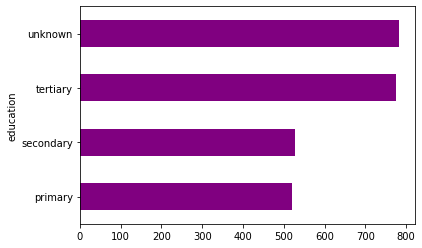

In [33]:
bank_new.groupby(['education'])['balance'].median().plot.barh(color='purple')

<font color='green'>Unknown section has highest Median and after that tertiary type education section has second highest median in Education column</font>

<h1><font color='grey'>Make a box plot for pdays. Do you see any outliers?</font></h1>

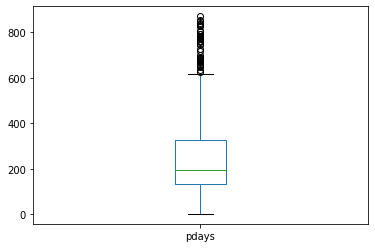

In [34]:
bank_new['pdays'].plot.box()

<font color='green'>On the above box plot we can say that there are outliers in pdays columan.</font>

In [16]:
bank_new['response'].value_counts()

no     6352
yes    1905
Name: response, dtype: int64

<font color='green'>We can see that here number of No's is more that number of Yes in our data. so we have imbalance problem in our data.</font>

<h2><font color='blue'>Bi-Variate Analysis</font></h2>

In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [18]:
bank.response.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: response, dtype: float64

In [19]:
bank_new.replace({'response':{'no':1,'yes':0}},inplace=True)

<font color='green'>In above cell we Converted the response variable to a convenient form</font>

In [20]:
bank.response.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: response, dtype: float64

<font color='green'>Hence we can see that most of the time response is No. Now to see the relation we will follow following steps</font>

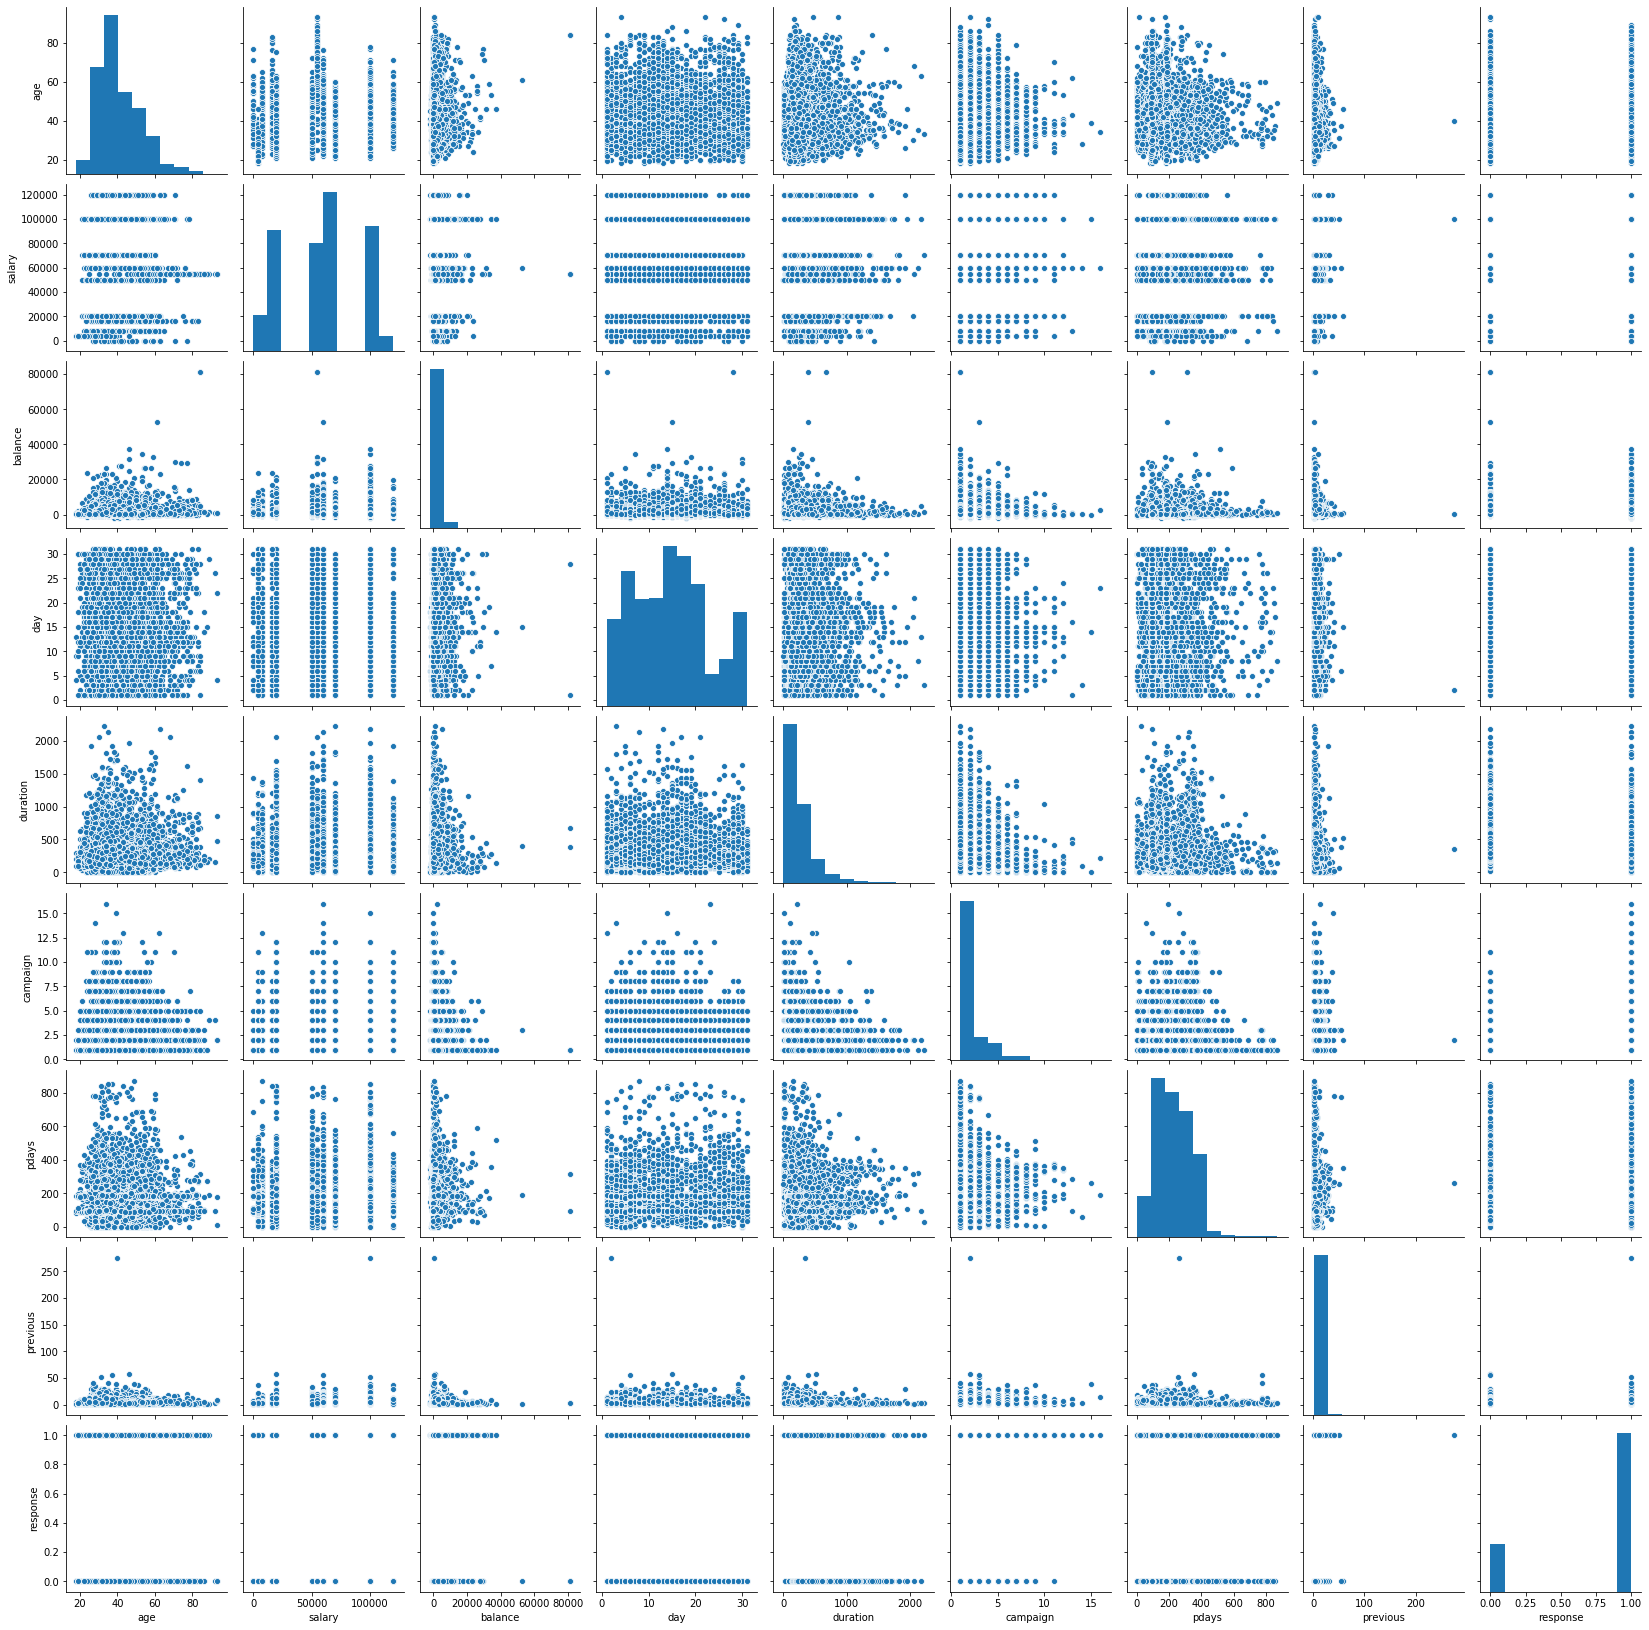

In [40]:
sns.pairplot(bank_new)
plt.show()

<font color='green'>We can observe that data here is not-symmetric. So lets find out the correlation matrix to look into details.</font>

<h2><font color='blue'>Correlation Matrix</font></h2>

In [41]:
bank_new.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.058322,0.115480,0.018399,0.060519,0.003842,-0.107863,0.002280,-0.072577
salary,0.058322,1.000000,0.066079,0.002379,0.005734,-0.018559,-0.106134,0.028427,-0.036774
balance,0.115480,0.066079,1.000000,0.051732,0.040998,-0.008150,-0.108122,0.001570,-0.076995
day,0.018399,0.002379,0.051732,1.000000,-0.012687,-0.029295,-0.090095,-0.016801,-0.029952
duration,0.060519,0.005734,0.040998,-0.012687,1.000000,-0.088394,-0.024407,-0.002150,-0.342610
campaign,0.003842,-0.018559,-0.008150,-0.029295,-0.088394,1.000000,0.050534,0.135523,0.094110
pdays,-0.107863,-0.106134,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885,0.152206
previous,0.002280,0.028427,0.001570,-0.016801,-0.002150,0.135523,-0.021885,1.000000,-0.008622
response,-0.072577,-0.036774,-0.076995,-0.029952,-0.342610,0.094110,0.152206,-0.008622,1.000000


<font color='green'>If responce increase than pdays and campaign are correlated becuase they are also increasing by 15.22% and 9.41% and when responce decrease than duration also decrease by 34.26%</font>

<h2><font color='blue'>Heat Map to Visualise correlation</font></h2>

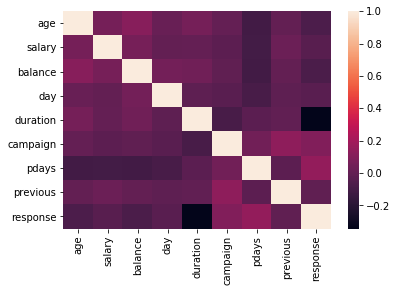

In [43]:
sns.heatmap(bank_new.corr())

<font color='green'>As per the pairplot, correlation matrix, and heatmap, observations as follow:</font>

<h2><font color='grey'>Make suitable plots for associations with numerical features and categorical features</font></h2>

<h2><font color='blue'>creating loop to know the numerical columns and catogorical columns</font></h2>

In [45]:
cat_col = []
num_col = []
for col in bank_new.columns:
    if bank_new[col].dtype=='O':
        cat_col.append(col)
    else:
        num_col.append(col)

In [46]:
print("catogorical features :",cat_col)
print("numarical features :",num_col)

catogorical features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numarical features : ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


<h2><font color='blue'>Relation of different columns with the target variable i.e response</font></h2>

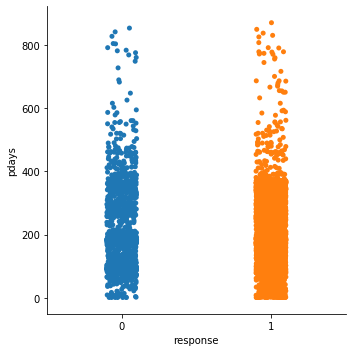

In [22]:
sns.catplot("response","pdays",data=bank_new)

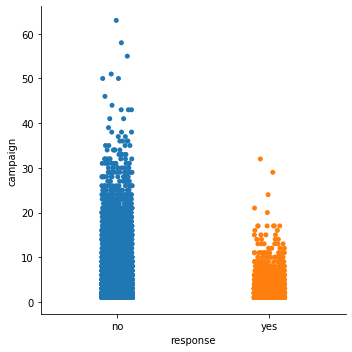

In [47]:
sns.catplot("response","campaign",data=bank)

<font color='green'>Upto 20 there are almost equal density for response Yes and No, but after compaign value 20 most of the time response is No.</font>

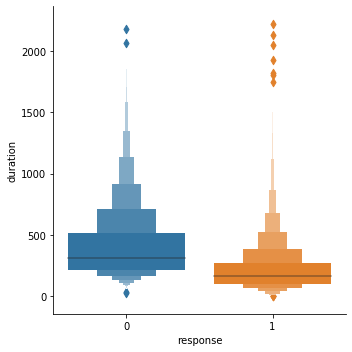

In [48]:
sns.catplot(x='response' , y='duration' , kind ="boxen", data =bank_new)

<h2><font color='blue'>Are the features about the previous campaign data useful?</font><h2>

In [49]:
bank_new['previous'].value_counts()

1      2772
2      2106
3      1142
4       714
5       459
6       277
7       205
8       129
9        92
10       67
11       65
12       44
13       38
15       20
14       19
17       15
16       13
19       11
20        8
23        8
18        6
22        6
27        5
24        5
21        4
29        4
25        4
30        3
37        2
28        2
26        2
38        2
32        1
40        1
55        1
41        1
58        1
51        1
275       1
35        1
Name: previous, dtype: int64

<font color='green'>Yes, it is important as we can see no of contacts performed before this campaign for the client and further what actions can be taken so that the client subscribes.</font>

<h2><font color='blue'>Are pdays and poutcome associated with the target</font></h2>

<font color='green'>As from the correlation Matrix we observed that pdays is associated with target(responce) by 15.22%</font>

In [23]:
pd.crosstab(bank_new['poutcome'],bank['response'])

response,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,3,2


<font color='green'>Above are the relation between poutcome and response,Thus we can say that only in case of success response is much, and in case of failure poutcome response is NO most of the time</font>

In [51]:
bank['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

<font color='green'> As we see, most of the data contain -1 values in pdays column, so we can't ignore that.</font>

<h2><font color='blue'>If yes(pdays and poutcome are associated with target), and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

<font color='green'> As above mentioned pdays is associated with the target but most of the values are -1 in pdays column, so we can't ignore them, so here we will drop the entire column pdays from bank dataset to reduced error</font> 

In [24]:
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [84]:
bank.drop(['pdays'], axis=1, inplace=True)
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,0,unknown,no


<font color='green'> Here, we delete pdays columns</font>

<h2><font color='blue'>Feature Selection techniques: following are the techniques that we have</font></h2>

<h2><font color='blue'>Which feature selection technique should be used for our data?</font></h2>

<h1><font color='grey'>Before the predictive modeling part, make sure to perform</font></h1>

 <h2><font color='blue'>The necessary transformations for the categorical variables and the numeric variable</font></h2>

In [25]:
bank_new

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,1
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,0
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,0
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,1
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,1
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,0
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,0
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,0


In [27]:
bank_new.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,1
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,0
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,0
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,1
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,0


In [47]:
from sklearn.preprocessing import LabelEncoder


In [48]:
no = LabelEncoder()

bank['housing'] = no.fit_transform(bank['housing'].astype('str'))
bank['loan'] = no.fit_transform(bank['loan'].astype('str'))
bank

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [49]:
bank['job'] = bank['job'].map(lambda x: x.rstrip("."))

In [50]:
bank['job']

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

<h2><font color='blue'>Handle variables corresponding to the previous campaign</font><h2>
 

In [51]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

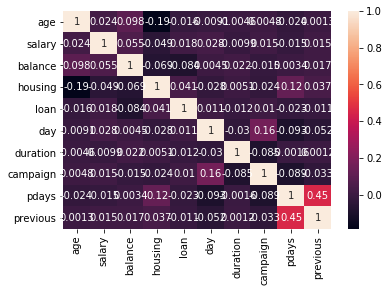

In [52]:
sns.heatmap(bank.corr(),annot=True)
plt.show()

<h2><font color='blue'> Train test split</font></h2>

In [36]:
bank_new.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [53]:
x = bank_new.iloc[:, 1:-1]
print('Independent Variables are:\n', x.head(2))

Independent Variables are:
           job  salary  marital  education default  balance housing loan  \
24060  admin.   50000  married   tertiary      no      882      no   no   
24062  admin.   50000   single  secondary      no     -247     yes  yes   

         contact  day month  duration  campaign  pdays  previous poutcome  
24060  telephone   21   oct        39         1    151         3  failure  
24062  telephone   21   oct       519         1    166         1    other  


In [54]:
y = bank_new.iloc[:, [-1]]
print('Target Variable is:\n', y.head(2))

Target Variable is:
        response
24060         1
24062         0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

<h1><font color='grey'>Predictive model 1:Logistic regression</font><h1>

<h2><font color='blue'>-Make a predictive model using logistic regression</font><h2>

In [57]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg = LogisticRegression()

In [59]:
df = bank_new[cat_col].apply(no.fit_transform)

In [207]:
df

,job,marital,education,default,contact,month,poutcome,response
0,4,1,2,0,2,8,3,0
1,9,2,1,0,2,8,3,0
2,2,1,1,0,2,8,3,0
3,1,1,3,0,2,8,3,0
4,11,2,3,0,2,8,3,0
...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,9,3,1
45207,5,0,0,0,0,9,3,1
45208,5,1,1,0,0,9,2,1
45209,1,1,1,0,1,9,3,0


In [61]:
data_prep=df.join(bank_new[num_col])
data_prep

,job,marital,education,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,1
24062,0,2,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,0
24064,7,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,0
24072,4,1,2,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,1
24077,4,1,2,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530,12,1
45201,4,1,2,0,0,0,0,9,2,53,100000,583,17,226,1,184,4,0
45204,5,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40,8,0
45208,5,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184,3,0


In [211]:
data_prep.corr()

,job,marital,education,default,contact,month,poutcome,response,age,salary,balance,housing,loan,day,duration,campaign,previous
job,1.000000,0.062045,0.166707,-0.006853,-0.082063,-0.092870,0.011010,0.040438,-0.021868,0.141655,0.018232,-0.125363,-0.033004,0.022856,0.004744,0.006839,-0.000911
marital,0.062045,1.000000,0.108576,-0.007023,-0.039201,-0.006991,-0.016850,0.045588,-0.403240,-0.016633,0.002122,-0.016096,-0.046893,-0.005261,0.011852,-0.008994,0.014973
education,0.166707,0.108576,1.000000,-0.010718,-0.110928,-0.057304,-0.019361,0.066241,-0.106807,0.425256,0.064514,-0.090790,-0.048574,0.022671,0.001935,0.006255,0.017570
default,-0.006853,-0.007023,-0.010718,1.000000,0.015404,0.011486,0.034898,-0.022419,-0.017879,0.006860,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.018329
contact,-0.082063,-0.039201,-0.110928,0.015404,1.000000,0.361145,0.272214,-0.148395,0.026221,-0.108612,-0.027273,0.188123,-0.010873,-0.027936,-0.020839,0.019614,-0.147811
month,-0.092870,-0.006991,-0.057304,0.011486,0.361145,1.000000,-0.033038,-0.024471,-0.042357,-0.050723,0.019777,0.271481,0.022145,-0.006028,0.006314,-0.110031,0.022727
poutcome,0.011010,-0.016850,-0.019361,0.034898,0.272214,-0.033038,1.000000,-0.077840,0.007367,-0.005864,-0.020967,-0.099971,0.015458,0.083460,0.010925,0.101588,-0.489752
response,0.040438,0.045588,0.066241,-0.022419,-0.148395,-0.024471,-0.077840,1.000000,0.025155,0.020012,0.052838,-0.139173,-0.068185,-0.028348,0.394521,-0.073172,0.093236
age,-0.021868,-0.403240,-0.106807,-0.017879,0.026221,-0.042357,0.007367,0.025155,1.000000,0.024357,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,0.001288
salary,0.141655,-0.016633,0.425256,0.006860,-0.108612,-0.050723,-0.005864,0.020012,0.024357,1.000000,0.055469,-0.048965,0.017749,0.027864,-0.009937,0.015005,0.014564


<font color='green'>To find correlation between variables and if both variables are positively increasing then the value is positive and versa.IF 0 than no correlation between variables...</font>

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(40)

In [63]:
x = data_prep.drop("response", axis=1)
x.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [214]:
y= data_prep[['response']]
y.head()

,response
0,0
1,0
2,0
3,0
4,0


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=40)

In [65]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
val=cross_val_score(log_reg,x_train,y_train,cv=5)

In [67]:
print(np.mean(val))

0.7818319454958365


In [70]:
y_pred=log_reg.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.17      0.26       385
           1       0.79      0.95      0.86      1267

    accuracy                           0.77      1652
   macro avg       0.66      0.56      0.56      1652
weighted avg       0.73      0.77      0.72      1652



In [72]:
print(confusion_matrix(y_test,y_pred))

[[  67  318]
 [  61 1206]]


In [73]:
f1_score(y_pred,y_test)

0.8642063776424221

<h2><font color='blue'>Use RFE to select top n features in an automated fashion (choose n as you see fit)</font><h2>

In [74]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(log_reg, 5)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [75]:
rfe.support_

array([False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False])

In [78]:
x_train.columns[rfe.support_]

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

In [79]:
cols = x_train.columns[rfe.support_]

In [80]:
log_reg.fit(x_train[cols],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred2 = log_reg.predict(x_test[cols])

In [82]:
f1_score(y_pred2,y_test)

0.8893838158871566

In [244]:
confusion_matrix(y_pred2,y_test)

array([[7976, 1067],
       [   0,    0]], dtype=int64)

In [83]:
import statsmodels.api as stm

In [84]:
x_train.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
28745,4,1,2,0,0,0,0,4,0,50,100000,0,30,199,1,205,1
29630,9,2,2,0,1,0,0,3,2,32,60000,703,3,489,2,271,2
27511,9,1,1,0,1,1,0,9,0,41,60000,2125,21,285,3,116,4
44349,4,2,2,0,0,0,0,5,2,45,100000,4831,30,852,3,182,11
25276,1,1,1,0,0,1,0,9,1,34,20000,932,18,148,2,132,1


In [85]:
x_train_stm = stm.add_constant(x_train[cols])

x_train_stm.head()

,const,education,default,housing,loan,poutcome
28745,1.0,2,0,0,0,0
29630,1.0,2,0,1,0,2
27511,1.0,1,0,1,1,0
44349,1.0,2,0,0,0,2
25276,1.0,1,0,0,1,1


In [86]:
reg1 = stm.OLS(endog=y_train,exog= x_train_stm).fit()

In [87]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     385.6
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:22:56   Log-Likelihood:                -2810.1
No. Observations:                6605   AIC:                             5632.
Df Residuals:                    6599   BIC:                             5673.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8010      0.013     62.979      0.000       0.776       0.826
education     -0.0333      0.006     -5.253      0.000      -0.046      -0.021
default        0.0356      0.055      0.649      0.516      -0.072       0.143
housing        0.1782      0.010     17.920      0.000       0.159       0.198
loan           0.0706      0.013      5.298      0.000       0.044       0.097
poutcome      -0.1891      0.006    -30.686      0.000      -0.201      -0.177
==============================================================================
Omnibus:                      756.977   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1039.732
Skew:                          -0.957   Prob(JB):                    1.68e-226
Kurtosis:                       3.341   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2><font color='blue'>Using p values and VIF, get rid of the redundant features</font></h2>

In [89]:
from statsmodels.stats .outliers_influence import variance_inflation_factor

<font color='green'>1 = not correlated. Between 1 and 5 = moderately correlated. Greater than 5 = highly correlated.</font>

In [90]:
vif=pd.DataFrame()

In [91]:
vif['features']=x_train.columns

In [92]:
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [254]:
vif

,features,VIF
7,age,9.77
6,poutcome,9.15
5,month,5.16
8,salary,5.13
2,education,4.57
12,day,4.56
1,marital,4.28
0,job,2.85
10,housing,2.41
13,duration,2.00


<h2><font color='blue'>Estimate the model performance using k fold cross validation</font></h2>

In [93]:
from sklearn.model_selection import KFold

In [94]:
kfold = KFold(3, True, 1)

<h2><font color='blue'>-Which features are the most important from your model?</font></h2>

<font color='green'> Housing, loan, default, poutcome are important feature from logistic regression model perspective</font>

<h1><font color='grey'>Predictive model 2: Random Forest</font></h2>

<h2><font color='blue'>Make a predictive model using random forest technique</font></h2>

In [95]:
from sklearn.ensemble import RandomForestClassifier

<h2><font color='blue'>Use not more than 50 trees, and control the depth of the trees to prevent overfitting</font></h2>

In [96]:
classifier=RandomForestClassifier(n_estimators=100,max_features=5,max_depth=5,criterion='entropy',random_state=0)

In [97]:
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<h2><font color='blue'>-Estimate the model performance using k fold cross validation</font><h2>

In [98]:
score=cross_val_score(classifier,x_train,y_train,cv=5)

In [99]:
print(np.mean(score))

0.8404239212717638


In [100]:
y_pred1 = classifier.predict(x_test)

<h2><font color='blue'>-What is the precision, recall, accuracy of your model?</font></h2>

In [101]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.50      0.59       385
           1       0.86      0.94      0.90      1267

    accuracy                           0.84      1652
   macro avg       0.80      0.72      0.75      1652
weighted avg       0.83      0.84      0.83      1652



In [266]:
confusion_matrix(y_test,y_pred1)

array([[7949,   27],
       [ 973,   94]], dtype=int64)

<h2><font color='blue'>Using the feature importance values from the Random Forest module, identify the most important features for the mode</font><h2>

In [102]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler=MinMaxScaler()

In [104]:
rfe1 = RFE(classifier, 5)
rfe1.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='entropy',
                                     max_depth=5, max_features=5,
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [105]:
rfe1.support_

array([False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False])

In [106]:
x_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [107]:
classifier.fit(x_train[cols],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [108]:
y_pred3 = classifier.predict(x_test[cols])

In [109]:
f1_score(y_pred3,y_test)

0.8847040737893926

In [110]:
confusion_matrix(y_pred3,y_test)

array([[ 201,  116],
       [ 184, 1151]], dtype=int64)

In [111]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       385
           1       0.86      0.91      0.88      1267

    accuracy                           0.82      1652
   macro avg       0.75      0.72      0.73      1652
weighted avg       0.81      0.82      0.81      1652



In [112]:
val1=cross_val_score(classifier,x_train,y_train,cv=5)

In [113]:
print(np.mean(val1))

0.8404239212717638


<h1><font color='grey'>Compare the performance of the Random Forest and the logistic model</font><h1>

<h2><font color='blue'>Evaluate both models on the test set</font></h2>

<font color='green'>As we do Above</font>

<h2><font color='blue'>Which metric did you choose and why</font><h2>

<font color='green'>Various ways to check the performance of our machine learning : Confusion matrix Accuracy Precision Recall Specificity F1 score Precision-Recall</font>

<h2><font color='blue'>Which model has better performance on the test set?</font></h2>

<font color='green'>Random forest has the better performance</font>

<h2><font color='blue'>Compare the feature importance from the different models – do they agree? Are the top features similar in both models?</font></h2>

<font color='green'> No, some of them are different</font>